# Winnining Wrestlers Entertainment

In this activity you will be taking four seperate csvs that were scraped down from a wrestling database, merging them together, and then creating charts to visualize a wrestler's wins and losses over the course of four years.

### Part 1 - Macho Merging

* You will likely need to perform three different merges over the course of this activity, changing the names of your columns as you go along.

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Take in all of our wrestling data and read it into pandas
wrestling_2013 = "../Resources/WWE-Data-2013.csv"
wrestling_2014 = "../Resources/WWE-Data-2014.csv"
wrestling_2015 = "../Resources/WWE-Data-2015.csv"
wrestling_2016 = "../Resources/WWE-Data-2016.csv"

wrestlers_2013_df = pd.read_csv(wrestling_2013)
wrestlers_2014_df = pd.read_csv(wrestling_2014)
wrestlers_2015_df = pd.read_csv(wrestling_2015)
wrestlers_2016_df = pd.read_csv(wrestling_2016)

In [4]:
# Merge the first two datasets on "Wrestler" so that no data is lost (should be 182 rows)
combined_wrestlers_df = pd.merge(wrestlers_2013_df, wrestlers_2014_df, how='outer', on='Wrestler')
combined_wrestlers_df

,Wrestler,Wins_x,Losses_x,Draws_x,Wins_y,Losses_y,Draws_y
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0
5,Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0
6,Ryback,103.0,88.0,3.0,43.0,114.0,1.0
7,Damien Sandow,39.0,147.0,3.0,3.0,113.0,0.0
8,Alberto Del Rio,126.0,53.0,4.0,31.0,82.0,1.0
9,Dolph Ziggler,62.0,117.0,1.0,134.0,60.0,2.0


In [5]:
# Rename our _x columns to "2013 Wins", "2013 Losses", and "2013 Draws"
combined_wrestlers_df = combined_wrestlers_df.rename(columns={"Wins_x":"2013 Wins", "Losses_x":"2013 Losses", "Draws_x":"2013 Draws"})

# Rename our _y columns to "2014 Wins", "2014 Losses", and "2014 Draws"
combined_wrestlers_df = combined_wrestlers_df.rename(columns={"Wins_y":"2014 Wins","Losses_y":"2014 Losses","Draws_y":"2014 Draws"})

combined_wrestlers_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0


In [6]:
# Merge our newly combined dataframe with the 2015 dataframe
combined_wrestlers_df = pd.merge(combined_wrestlers_df, wrestlers_2015_df, how="outer", on="Wrestler")
combined_wrestlers_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0
5,Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0
6,Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0
7,Damien Sandow,39.0,147.0,3.0,3.0,113.0,0.0,50.0,9.0,2.0
8,Alberto Del Rio,126.0,53.0,4.0,31.0,82.0,1.0,26.0,13.0,2.0
9,Dolph Ziggler,62.0,117.0,1.0,134.0,60.0,2.0,115.0,52.0,2.0


In [7]:
# Rename "wins", "losses", and "draws" to "2015 Wins", "2015 Losses", and "2015 Draws"
combined_wrestlers_df = combined_wrestlers_df.rename(columns={"Wins":"2015 Wins","Losses":"2015 Losses","Draws":"2015 Draws"})

combined_wrestlers_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0


In [8]:
# Merge our newly combined dataframe with the 2016 dataframe
combined_wrestlers_df = pd.merge(combined_wrestlers_df, wrestlers_2016_df, how="outer", on="Wrestler")
combined_wrestlers_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,Wins,Losses,Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0
5,Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0
6,Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0
7,Damien Sandow,39.0,147.0,3.0,3.0,113.0,0.0,50.0,9.0,2.0,11.0,18.0,0.0
8,Alberto Del Rio,126.0,53.0,4.0,31.0,82.0,1.0,26.0,13.0,2.0,24.0,65.0,2.0
9,Dolph Ziggler,62.0,117.0,1.0,134.0,60.0,2.0,115.0,52.0,2.0,114.0,56.0,2.0


In [9]:
# Rename "wins", "losses", and "draws" to "2016 Wins", "2016 Losses", and "2016 Draws"
combined_wrestlers_df = combined_wrestlers_df.rename(columns={"Wins":"2016 Wins","Losses":"2016 Losses","Draws":"2016 Draws"})

combined_wrestlers_df.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,NaN,NaN,NaN
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0


In [10]:
# Replace all NaN values with 0 
combined_wrestlers_df = combined_wrestlers_df.fillna(0)

# Create a new column called "Total Wins" and add up each wrestler's wins per year to fill in the values
combined_wrestlers_df["Total Wins"] = combined_wrestlers_df["2013 Wins"] + combined_wrestlers_df["2014 Wins"] + combined_wrestlers_df["2015 Wins"] + combined_wrestlers_df["2016 Wins"]

# Create a new column called "Total Losses" and add up each wrestler's losses per year to fill in the values
combined_wrestlers_df["Total Losses"] = combined_wrestlers_df["2013 Losses"] + combined_wrestlers_df["2014 Losses"] + combined_wrestlers_df["2015 Losses"] + combined_wrestlers_df["2016 Losses"]

# Create a new column called "Total Draws" and add up each wrestler's draws per year to fill in the values
combined_wrestlers_df["Total Draws"] = combined_wrestlers_df["2013 Draws"] + combined_wrestlers_df["2014 Draws"] + combined_wrestlers_df["2015 Draws"] + combined_wrestlers_df["2016 Draws"]

# Create a new column called "Total Matches" and add up the total wins, losses, and draws for each wrestler to fill in the values
combined_wrestlers_df["Total Matches"] = combined_wrestlers_df["Total Wins"] + combined_wrestlers_df["Total Losses"] + combined_wrestlers_df["Total Draws"]

combined_wrestlers_df

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0,263.0,60.0,8.0,331.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,150.0,1.0,236.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
5,Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0,496.0,199.0,21.0,716.0
6,Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0,321.0,253.0,7.0,581.0
7,Damien Sandow,39.0,147.0,3.0,3.0,113.0,0.0,50.0,9.0,2.0,11.0,18.0,0.0,103.0,287.0,5.0,395.0
8,Alberto Del Rio,126.0,53.0,4.0,31.0,82.0,1.0,26.0,13.0,2.0,24.0,65.0,2.0,207.0,213.0,9.0,429.0
9,Dolph Ziggler,62.0,117.0,1.0,134.0,60.0,2.0,115.0,52.0,2.0,114.0,56.0,2.0,425.0,285.0,7.0,717.0


In [11]:
# Create a new dataframe for those wrestlers who have wrestled at least 100 matches,
# have at least one win in 2013,
# and have at least one win in 2016
wrestled_over_hundred = combined_wrestlers_df.loc[(combined_wrestlers_df["Total Matches"] >= 100) &
                                                 (combined_wrestlers_df["2013 Wins"] > 0) &
                                                 (combined_wrestlers_df["2016 Wins"] > 0)]

# Set the index of this new dataframe to be the wrestlers names
wrestled_over_hundred = wrestled_over_hundred.set_index("Wrestler")

wrestled_over_hundred.head()

,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws,Total Wins,Total Losses,Total Draws,Total Matches
Wrestler,,,,,,,,,,,,,,,,
Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0,482.0,300.0,15.0,797.0
Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0,227.0,454.0,13.0,694.0
Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0,282.0,181.0,14.0,477.0
Roman Reigns,49.0,140.0,5.0,118.0,28.0,4.0,187.0,19.0,7.0,142.0,12.0,5.0,496.0,199.0,21.0,716.0
Ryback,103.0,88.0,3.0,43.0,114.0,1.0,138.0,34.0,2.0,37.0,17.0,1.0,321.0,253.0,7.0,581.0


### Part 3 - Charting Careers

* Create a variable and an input that asks the user what wrestler they would like to look for. 

* Store an individual wrestler's wins over time in a variable

* Store that same wrestler's losses over time in a variable as well

* Create a line chart that will plot this wrestler's wins and losses from 2013 to 2016

In [12]:
# Collect the user's input to search through our data frame
wrestler_name = input("What wrestler's career would you like to look at?")

What wrestler's career would you like to look at?Ryback


In [13]:
# Create a series that looks for a wrestler by name and then traces their wins from 2013 to 2016
wins_over_time = wrestled_over_hundred.loc[wrestler_name,["2013 Wins","2014 Wins", "2015 Wins", "2016 Wins"]]

# Create a series that looks for a wrestler by name and then traces their losses from 2013 to 2016
losses_over_time = wrestled_over_hundred.loc[wrestler_name,["2013 Losses","2014 Losses",
                                                            "2015 Losses", "2016 Losses"]]

<IPython.core.display.Javascript object>


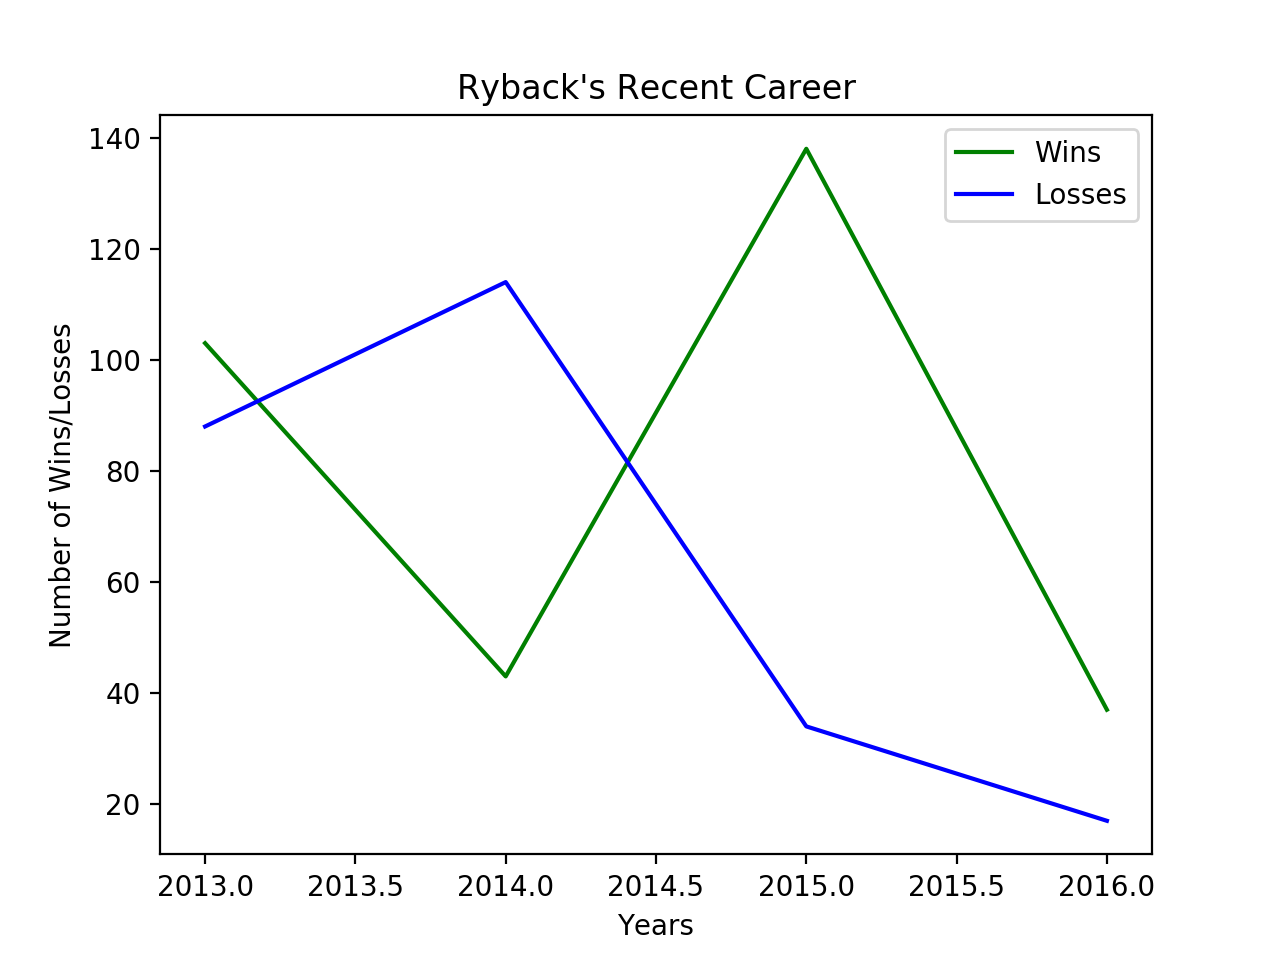

In [14]:
# Create a list of the years that we will use as our x axis
years = [2013,2014,2015,2016]

# Plot our line that will be used to track a wrestler's wins over the years
plt.plot(years, wins_over_time, color="green", label="Wins")

# Plot our line that will be used to track a wrestler's losses over the years
plt.plot(years, losses_over_time, color="blue", label="Losses")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

plt.title(wrestler_name + "'s Recent Career")
plt.xlabel("Years")
plt.ylabel("Number of Wins/Losses")

# Print our chart to the screen
plt.show()